In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
data = pd.read_csv("//home//saurabh_kokare//Downloads//Car_Purchasing_Data.csv",encoding='ISO-8859-1')
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [4]:
data['Customer Name'] = data['Customer Name'].str.replace(',', '', regex=False)
data['Customer Name'] = data['Customer Name'].str.replace('.', '', regex=False)


In [45]:
data['Age']=data['Age'].astype(int)
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [6]:
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [7]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,45.774000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.988652,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [8]:
X__ = data.drop(columns=['Customer Name', 'Customer e-mail', 'Country'])

In [9]:
X_scale = StandardScaler()
X_scale.fit_transform(X__)

array([[-1.01207287, -0.59819619,  0.05857619,  0.57427133, -1.11046945,
        -0.82586972],
       [-1.01207287, -0.72349912,  0.38657041, -0.0099515 ,  0.57392937,
         0.08415655],
       [ 0.98807114, -0.34759033, -0.71236095,  0.4454518 ,  1.19397625,
        -0.11931261],
       ...,
       [ 0.98807114,  0.90543897,  0.57832106,  0.28802326,  1.92114437,
         1.85251332],
       [ 0.98807114,  1.65725655, -1.05333541,  1.26384749, -0.54019026,
         0.11450553],
       [ 0.98807114,  0.02831846, -0.06470949, -0.06205457,  0.18153098,
         0.08338534]])

In [10]:
data['Age']=X__['Age']
data['Annual Salary']=X__['Annual Salary']
data['Car Purchase Amount']=X__['Car Purchase Amount']
data['Credit Card Debt']=X__['Credit Card Debt']
data['Gender']=X__['Gender']
data['Net Worth']=X__['Net Worth']

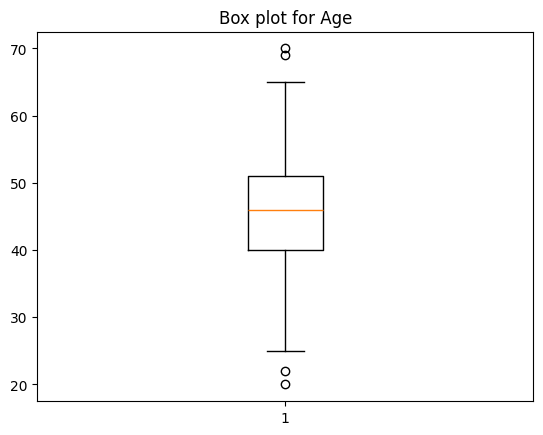

In [11]:
plt.boxplot(data['Age'])
plt.title("Box plot for Age")
plt.show()

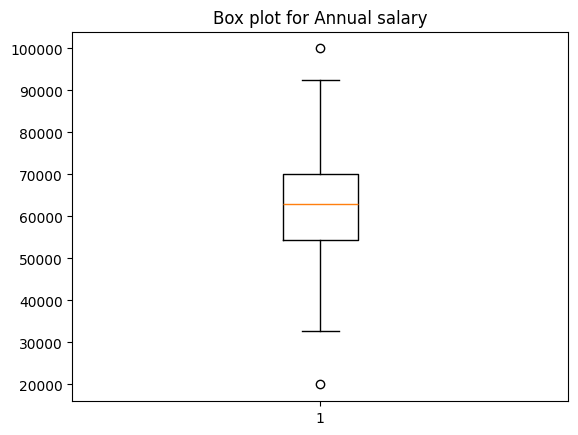

In [12]:
plt.boxplot(data['Annual Salary'])
plt.title("Box plot for Annual salary")
plt.show()

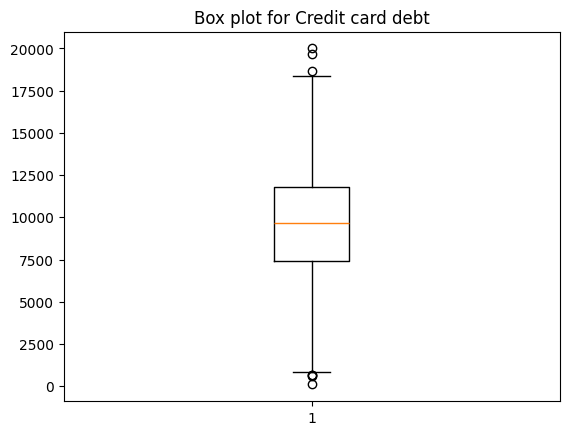

In [13]:
plt.boxplot(data['Credit Card Debt'])
plt.title("Box plot for Credit card debt")
plt.show()

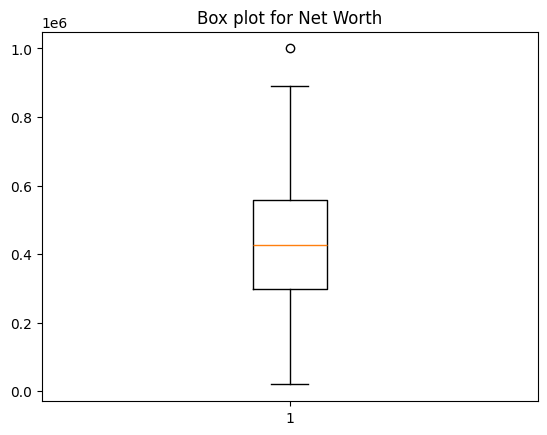

In [14]:
plt.boxplot(data['Net Worth'])
plt.title("Box plot for Net Worth")
plt.show()

In [15]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

df = pd.DataFrame(X__)

All_features = ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth','Car Purchase Amount']

for feature in All_features:
    df = remove_outliers(df, feature)


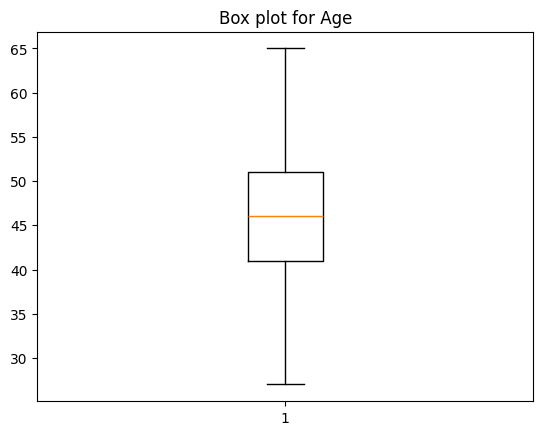

In [16]:
plt.boxplot(df['Age'])
plt.title("Box plot for Age")
plt.show()

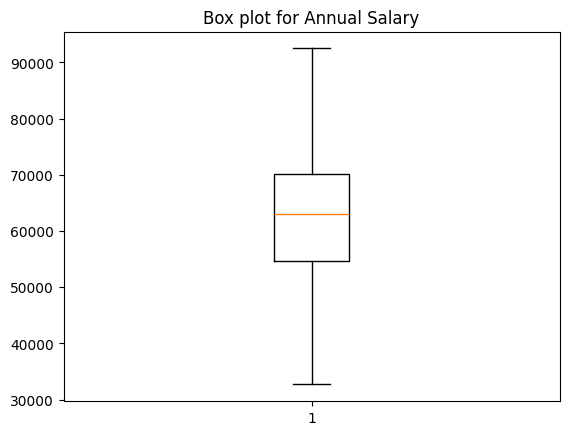

In [17]:
plt.boxplot(df['Annual Salary'])
plt.title("Box plot for Annual Salary")
plt.show()

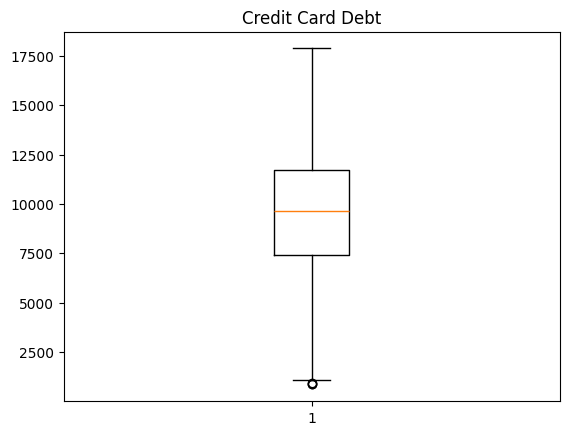

In [18]:
plt.boxplot(df['Credit Card Debt'])
plt.title("Credit Card Debt")
plt.show()

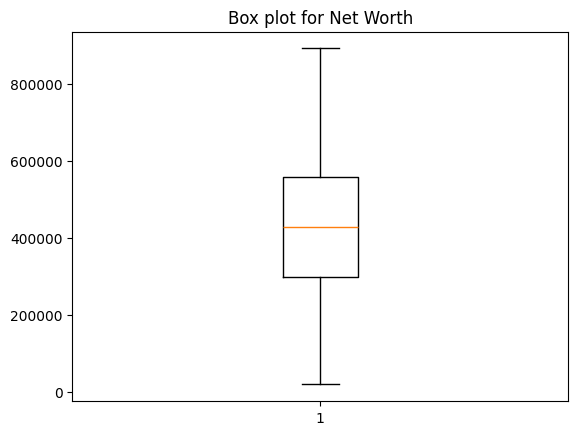

In [19]:
plt.boxplot(df['Net Worth'])
plt.title('Box plot for Net Worth')
plt.show()

In [20]:
X_valid = df[['Gender','Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']]
y_valid=df['Car Purchase Amount']

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X_valid,y_valid,test_size=0.3)


In [22]:
X_train.shape

(338, 5)

In [23]:
X_test.shape

(145, 5)

In [24]:
model=DecisionTreeRegressor(criterion="squared_error")
model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [25]:
X_test.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
13,0,48,68304.47298,9466.995128,420322.0702
3,1,58,79370.03798,14426.164850,548599.0524
314,0,47,67080.61420,7880.423663,244188.0008
79,0,45,52697.15192,861.816653,540805.4940
412,1,43,57376.48030,12878.545820,376886.3590


In [26]:

Y__ = model.predict(X_test)
Y__


array([53489.46214, 66648.25077, 45366.35963, 45208.42539, 38042.80065,
       37843.46619, 49399.97041, 45271.46081, 56563.98675, 42704.3221 ,
       53496.48183, 66363.89316, 51941.6756 , 37348.13737, 47693.23482,
       46402.53583, 39083.94268, 39083.94268, 49730.53339, 45015.67953,
       47805.25605, 53017.26723, 67092.23276, 48785.15839, 38182.30465,
       40004.87142, 44463.30502, 36645.5609 , 29092.1311 , 50539.90169,
       22091.11839, 41451.71843, 39422.79389, 32967.20191, 42288.81046,
       21471.11367, 50441.62427, 43598.96993, 45167.32542, 38504.39444,
       41769.38288, 59045.51309, 38174.87433, 37076.82508, 30419.8    ,
       30964.07804, 52056.41478, 44650.36073, 30964.07804, 33766.6413 ,
       29002.05665, 31146.71078, 45805.67186, 46412.47781, 56071.61377,
       49373.37555, 49050.85378, 60567.18837, 43901.71244, 28925.70549,
       46402.53583, 38189.50601, 37183.10293, 52709.08196, 38172.83602,
       38042.80065, 46412.47781, 54823.19221, 38147.81018, 43641

In [60]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [27]:
accuracy = r2_score(Y_test,Y__)
accuracy

0.9056511559187115

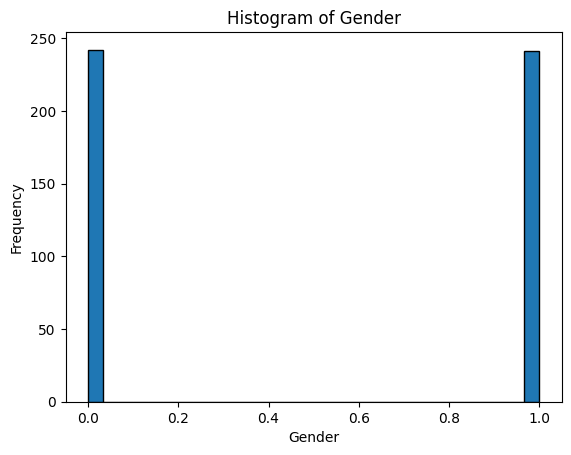

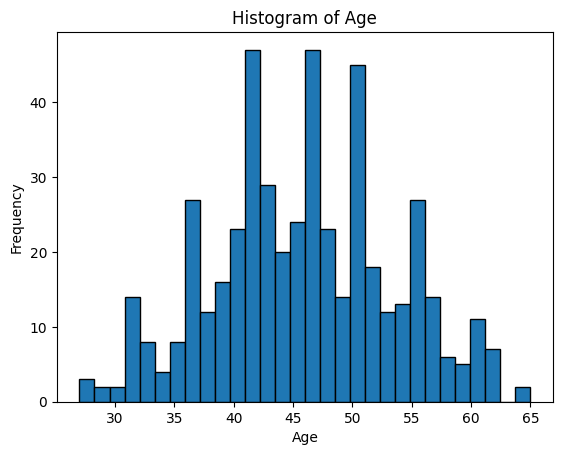

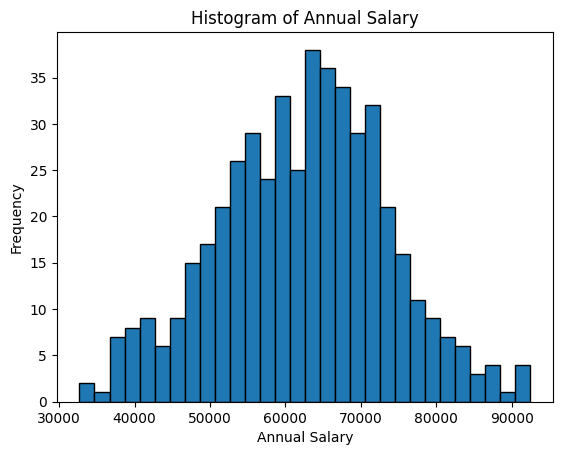

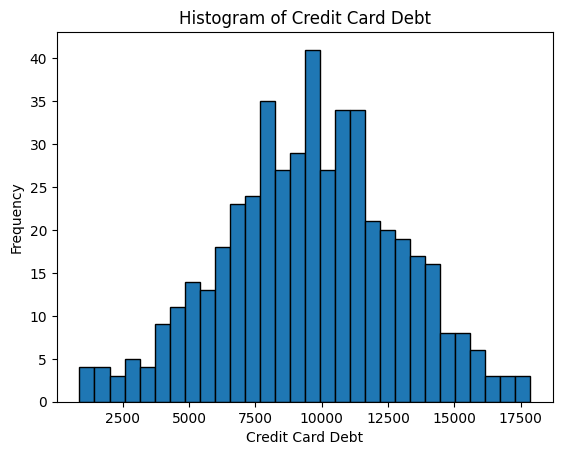

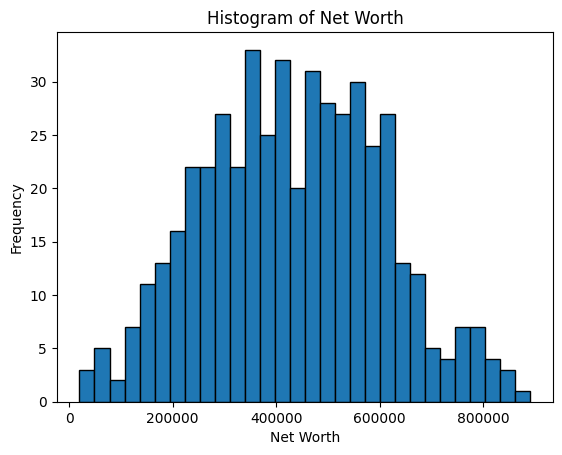

In [46]:

features = ['Gender','Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']

for feature in features:
    plt.hist(df[feature], bins=30, edgecolor='k')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [47]:
model.get_depth()

14

In [48]:
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature

In [49]:
c=0
for node in range(model.tree_.node_count):
    if children_left[node]!= children_right[node]:
        left_child=children_left[node]
        right_child=children_right[node]
        
        c=c+1
        print(node)
        print(f"Left child : Node{left_child}(Feature:{feature[node]})")
        print(f"Right child : Node{right_child}(Feature:{feature[node]})")

0
Left child : Node1(Feature:2)
Right child : Node292(Feature:2)
1
Left child : Node2(Feature:1)
Right child : Node151(Feature:1)
2
Left child : Node3(Feature:4)
Right child : Node52(Feature:4)
3
Left child : Node4(Feature:1)
Right child : Node41(Feature:1)
4
Left child : Node5(Feature:2)
Right child : Node28(Feature:2)
5
Left child : Node6(Feature:2)
Right child : Node7(Feature:2)
7
Left child : Node8(Feature:1)
Right child : Node17(Feature:1)
8
Left child : Node9(Feature:4)
Right child : Node16(Feature:4)
9
Left child : Node10(Feature:2)
Right child : Node13(Feature:2)
10
Left child : Node11(Feature:3)
Right child : Node12(Feature:3)
13
Left child : Node14(Feature:1)
Right child : Node15(Feature:1)
17
Left child : Node18(Feature:2)
Right child : Node21(Feature:2)
18
Left child : Node19(Feature:4)
Right child : Node20(Feature:4)
21
Left child : Node22(Feature:2)
Right child : Node25(Feature:2)
22
Left child : Node23(Feature:2)
Right child : Node24(Feature:2)
25
Left child : Node26(Fea

In [50]:
model.decision_path(X_valid, check_input=True)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4990 stored elements and shape (483, 675)>

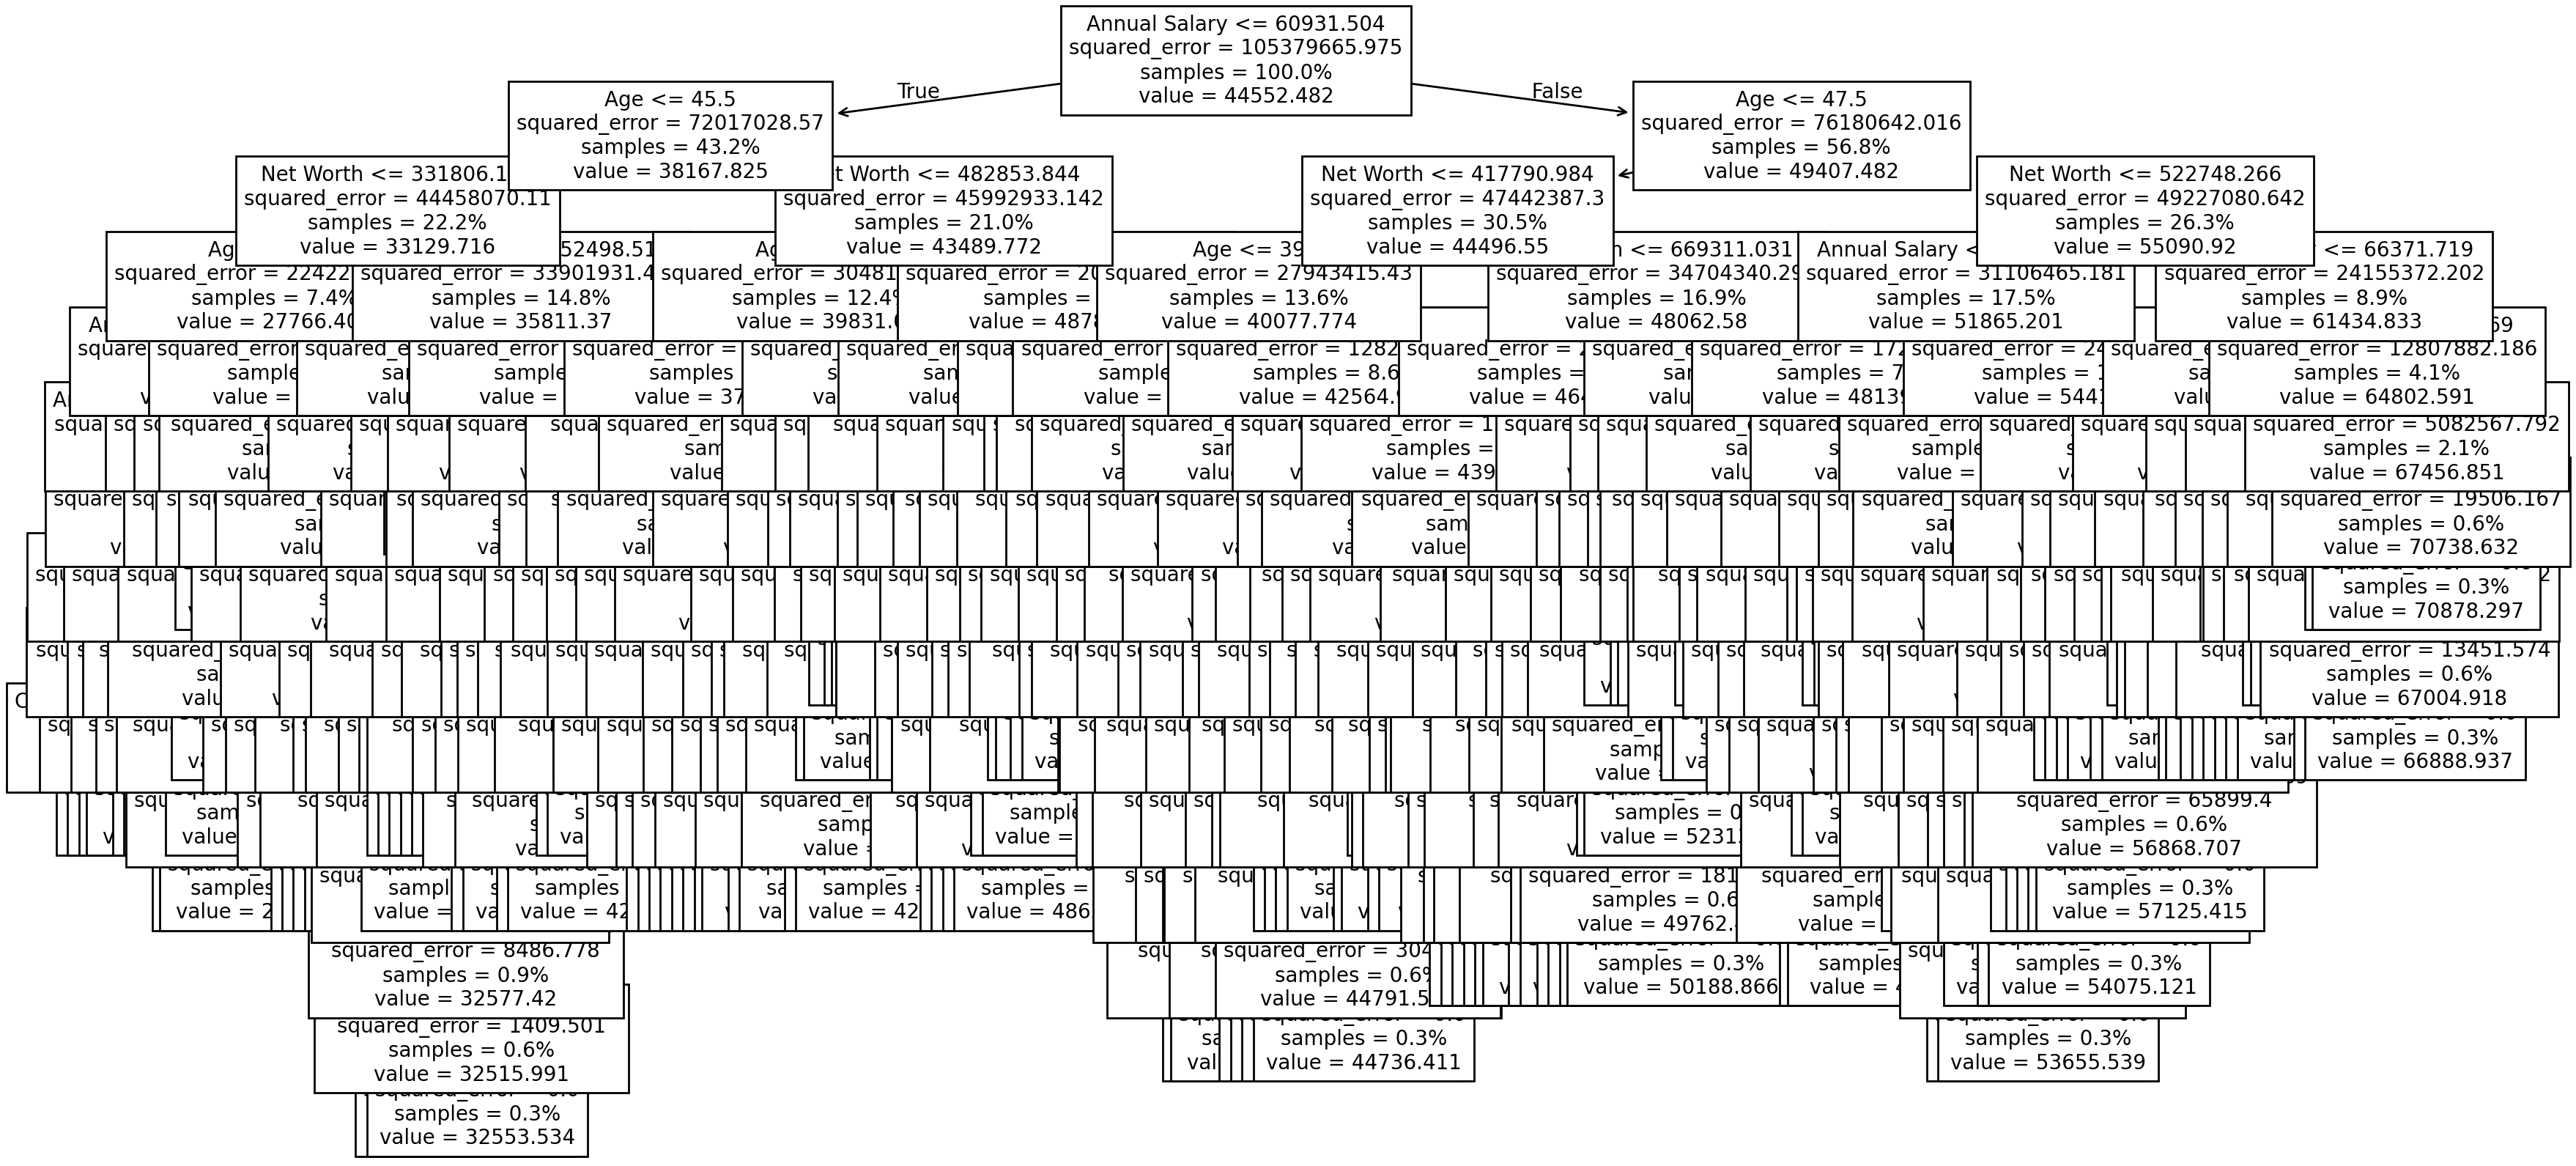

In [63]:
from sklearn import tree
plt.figure(figsize=(20, 10), dpi=200)

tree.plot_tree(model, proportion=True, fontsize=10, feature_names=['Gender','Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'])
#plt.savefig("Decision tree_1")
plt.show()